### Cleaning Numerical Data

1. Import the necessary libraries.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2. Load the customer_value_analysis.csv into the variable customer_df.


In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info).


In [3]:
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).
5. Change the type of effective_to_date column to DateTime format.


In [5]:
def clean_data(data):
    data.columns=[e.lower().replace(' ', '_') for e in data.columns]
    data['effective_to_date']=pd.to_datetime(data['effective_to_date'], errors='coerce')
    return data

clean_data(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


6. Check NaN values per column.


In [6]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.


In [7]:
def split_numerical_categorical(data):
    numerical_df = data.select_dtypes(include=[np.number])
    categorical_df = data.select_dtypes(include=['object'])
    return numerical_df, categorical_df
numerical_df, categorical_df = split_numerical_categorical(data)

In [8]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


8. Drop any ID column.


In [10]:
data.drop('customer', axis=1, inplace=True)

In [11]:
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?


In [12]:
correlations_matrix = data.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


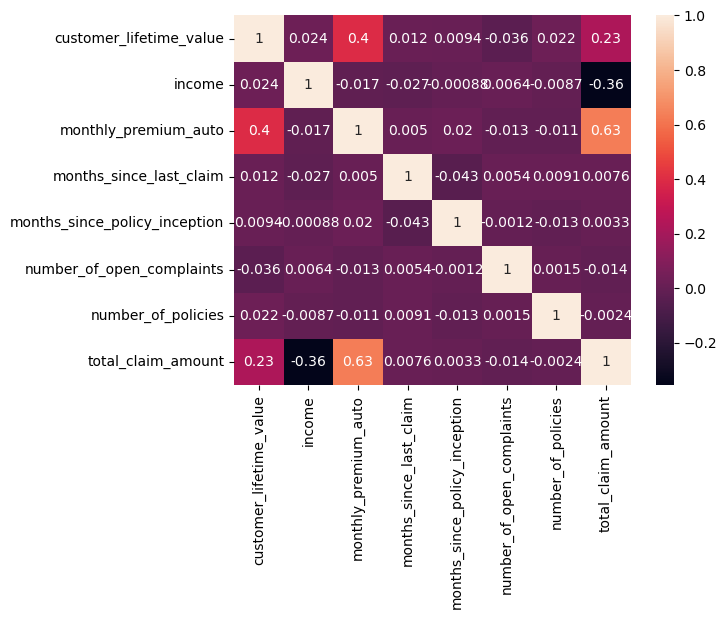

In [13]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.


In [14]:
def split_continuous_discrete(data, threshold=36):
    num_cols = data.select_dtypes(include=[np.number]).columns
    cont_cols = []
    disc_cols = []
    for col in num_cols:
        if len(data[col].unique()) > threshold:
            cont_cols.append(col)
        else:
            disc_cols.append(col)
    continuous_df = data[cont_cols]
    discrete_df = data[disc_cols]
    
    return continuous_df, discrete_df

continuous_df, discrete_df = split_continuous_discrete(data)

In [15]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [16]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).


In [17]:
def create_barplot(discrete_df):
    plt.figure(figsize=(16, 16))
    for col in discrete_df.columns:
        plt.subplot(2, 2, discrete_df.columns.get_loc(col) + 1)
        sns.countplot(x=col, data=discrete_df)
        plt.title(col)
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

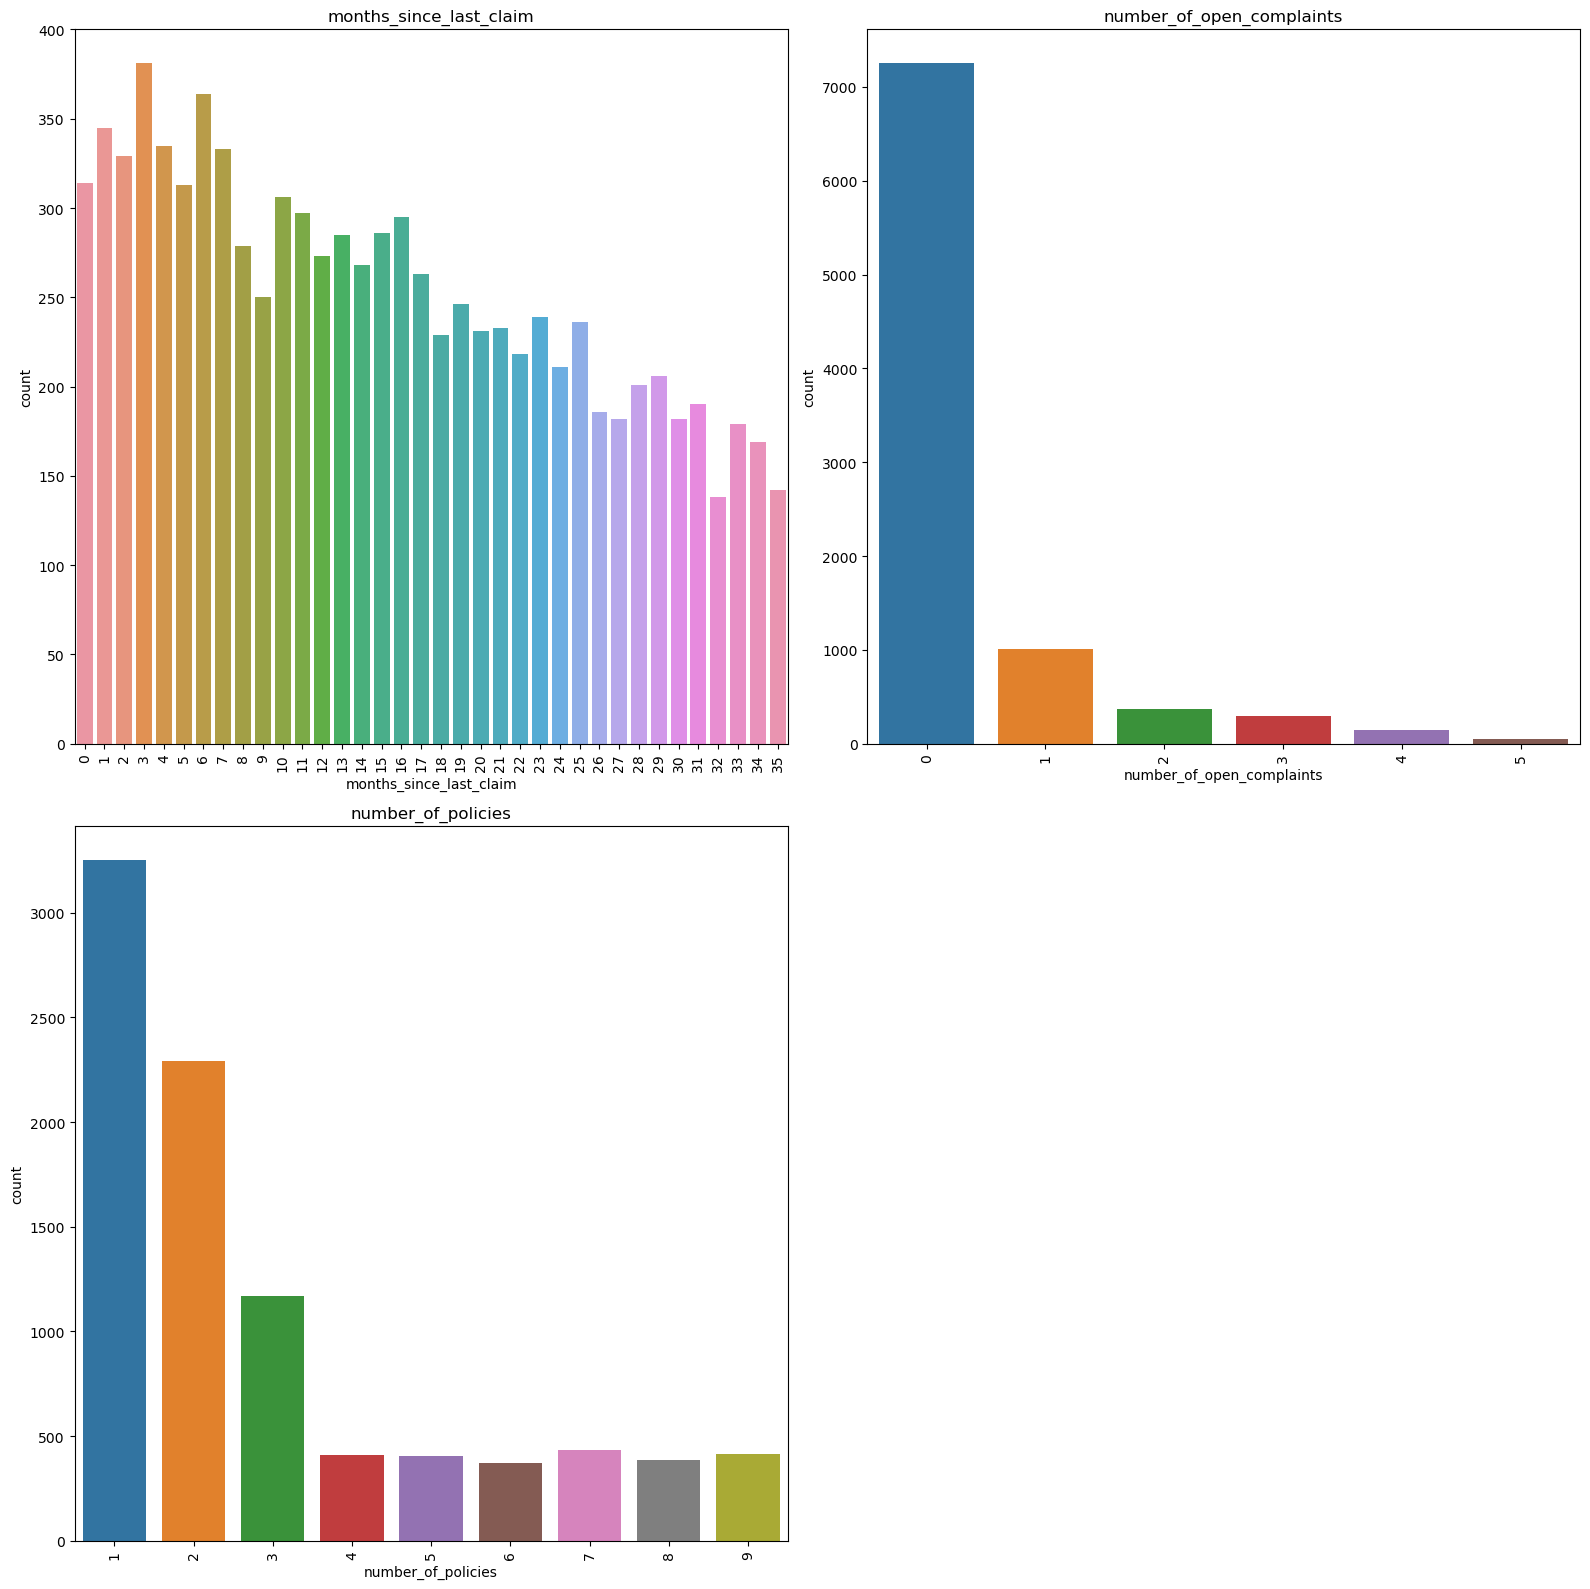

In [18]:
create_barplot(discrete_df)

12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)


In [19]:
def create_histogram(continuous_df):
    plt.figure(figsize=(16, 16))
    for col in continuous_df.columns:
        plt.subplot(5, 2, continuous_df.columns.get_loc(col) + 1)
        sns.histplot(x=col, data=continuous_df, kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

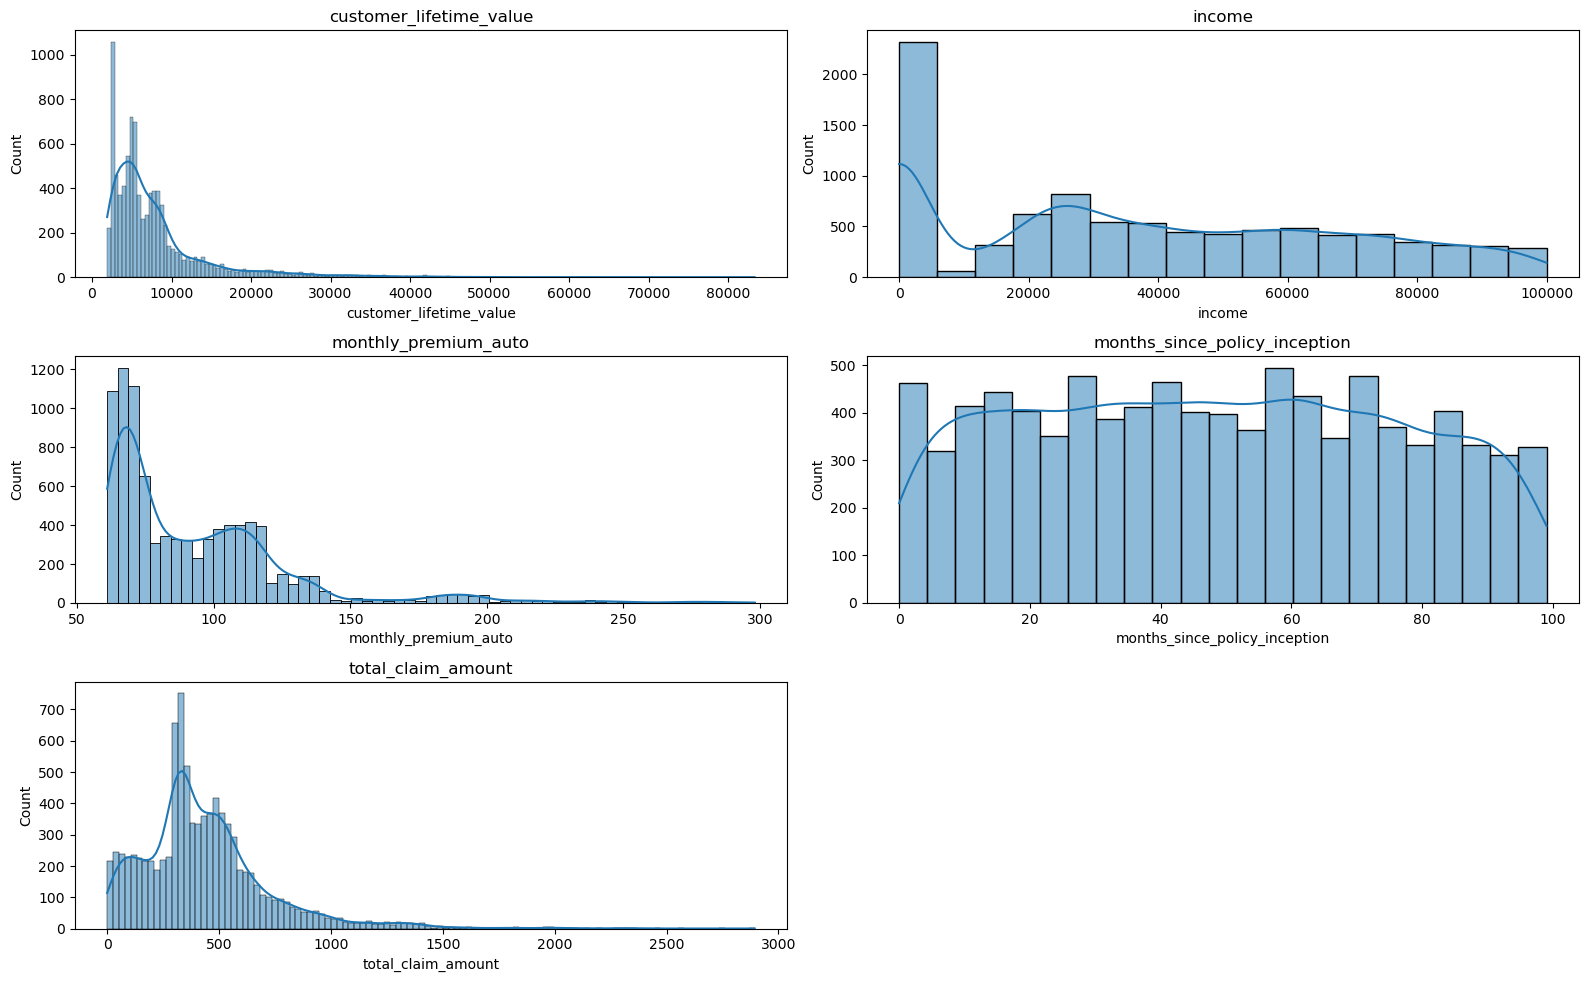

In [20]:
create_histogram(continuous_df)

13. According to the previous histogram plots, do you think that you will have to apply any transformation?


Yes, none of the variables have a normal distribution.

14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [21]:
def create_boxplot(continuous_df):
    plt.figure(figsize=(16, 16))  
    for col in continuous_df.columns:
        plt.subplot(7, 2, continuous_df.columns.get_loc(col) + 1)
        sns.boxplot(x=col, data=continuous_df)
        plt.title(col)
    plt.tight_layout()
    plt.show()

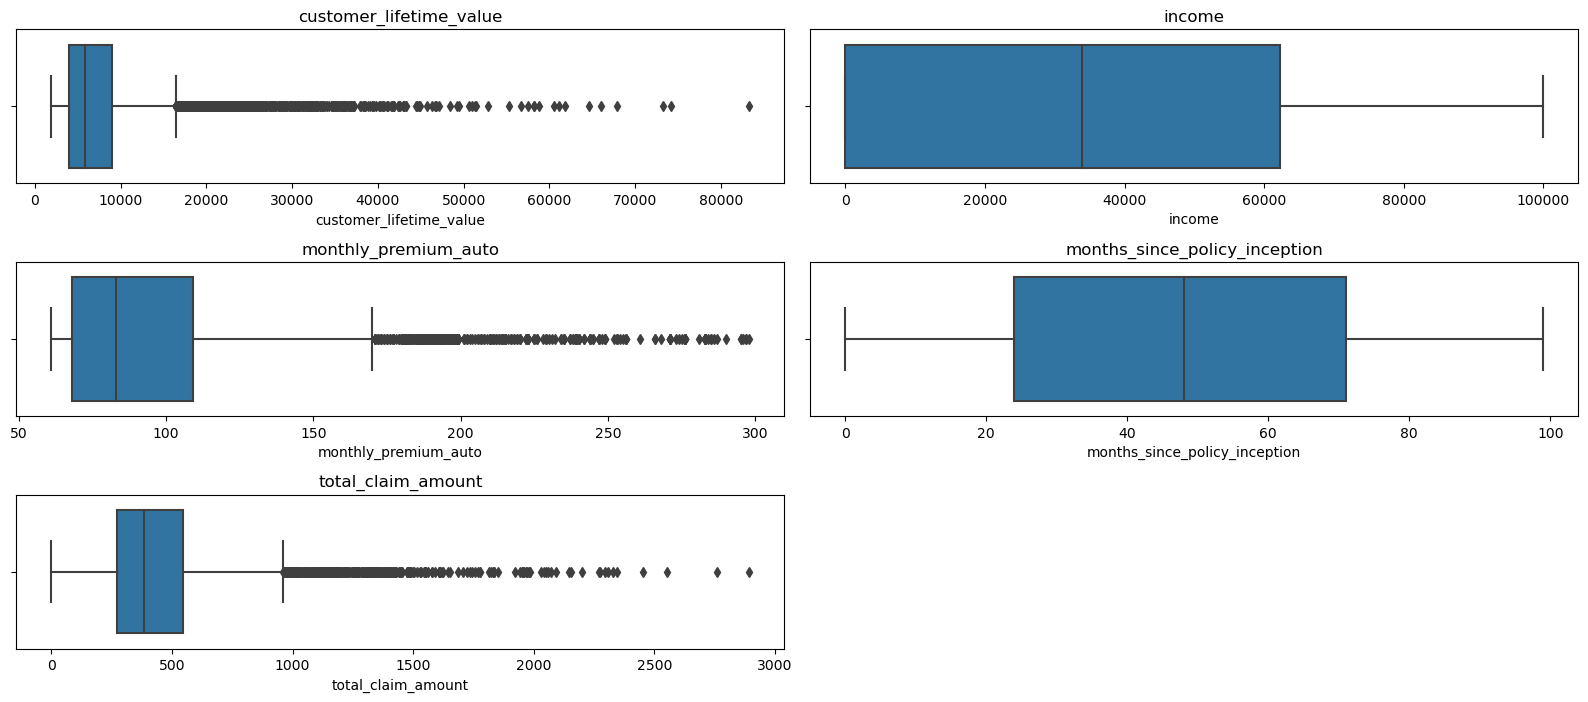

In [22]:
create_boxplot(continuous_df)

### Lab Cleaning Categorical Data

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.


In [23]:
def create_countplots(data):
    for col in data.select_dtypes(include='object'):
        plt.figure(figsize=(10, 6))
        if len(data[col].unique()) >= 6:
            sns.countplot(y=col, data=data, order=data[col].value_counts().index)
        else:
            sns.countplot(x=col, data=data, order=data[col].value_counts().index)
        plt.title(col)
        plt.show()


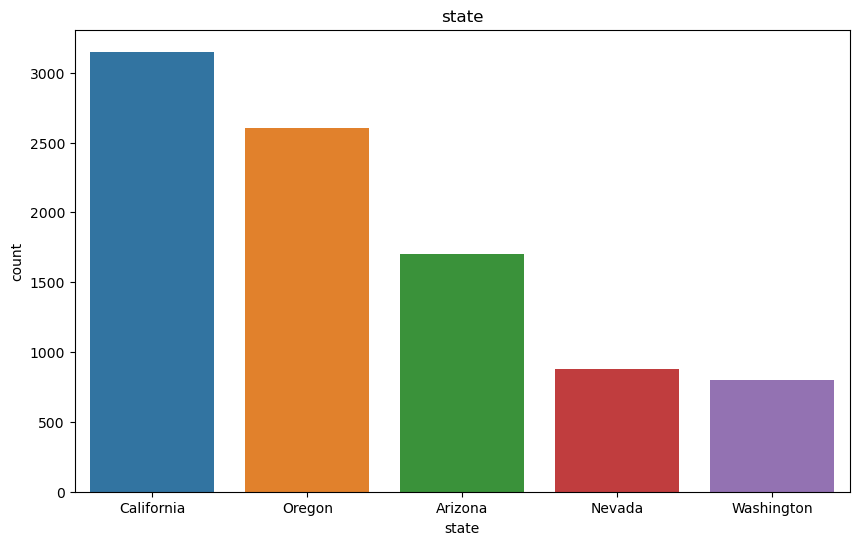

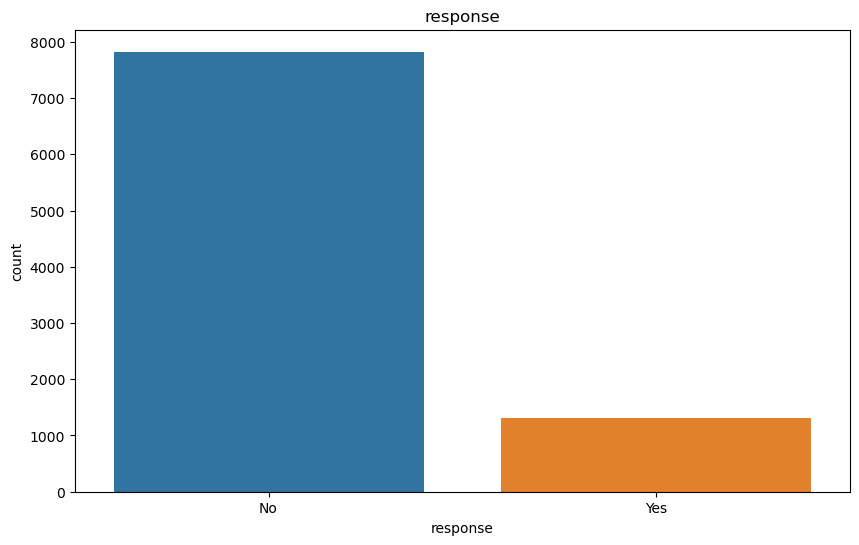

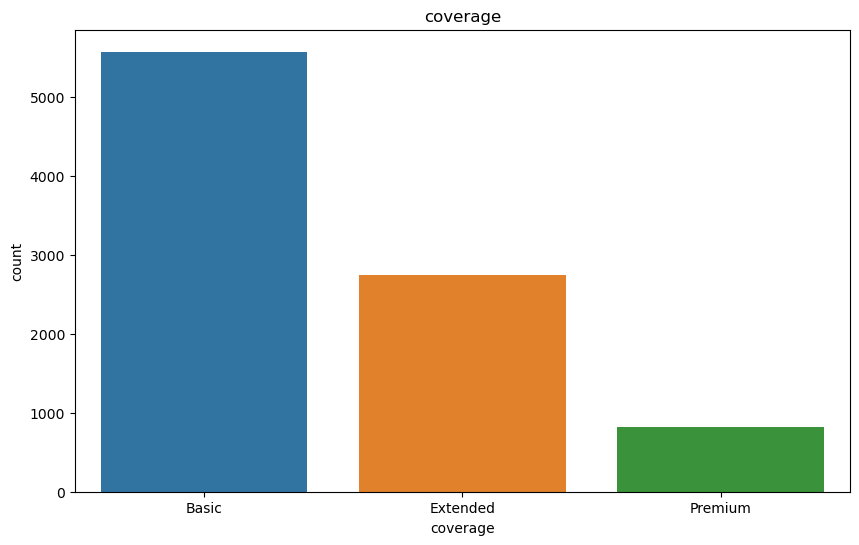

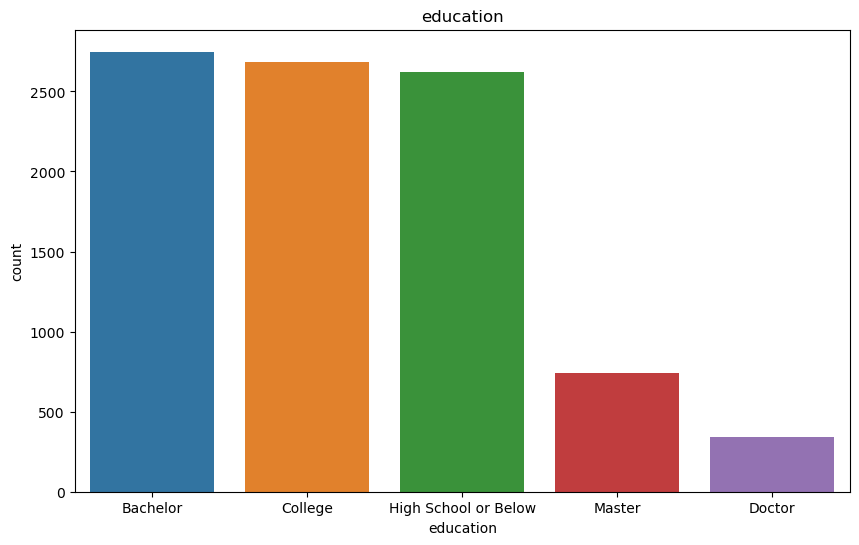

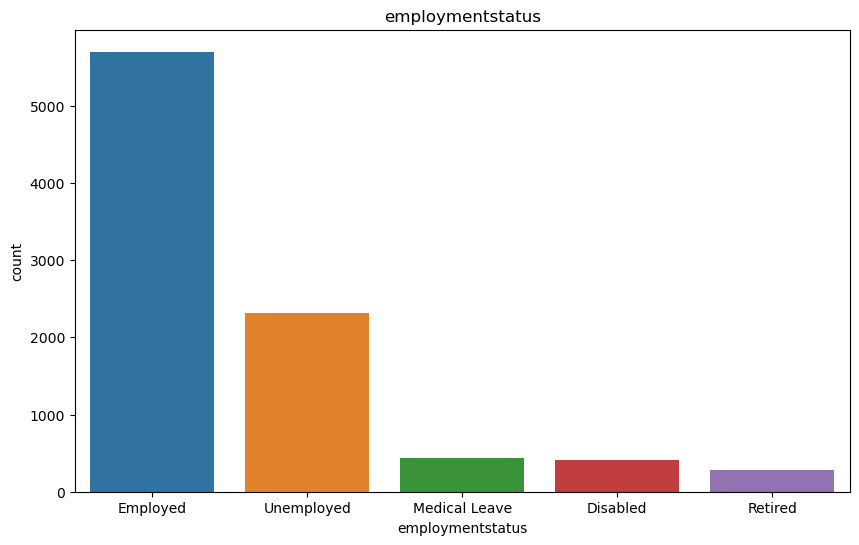

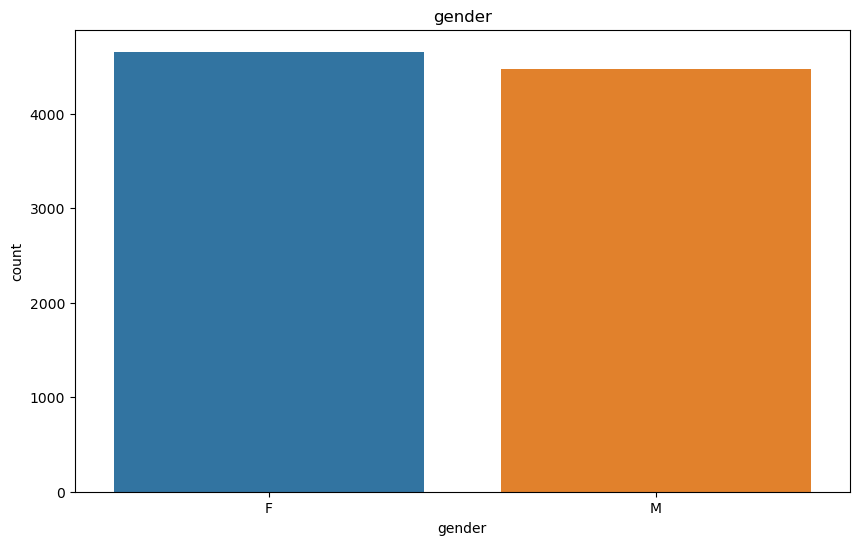

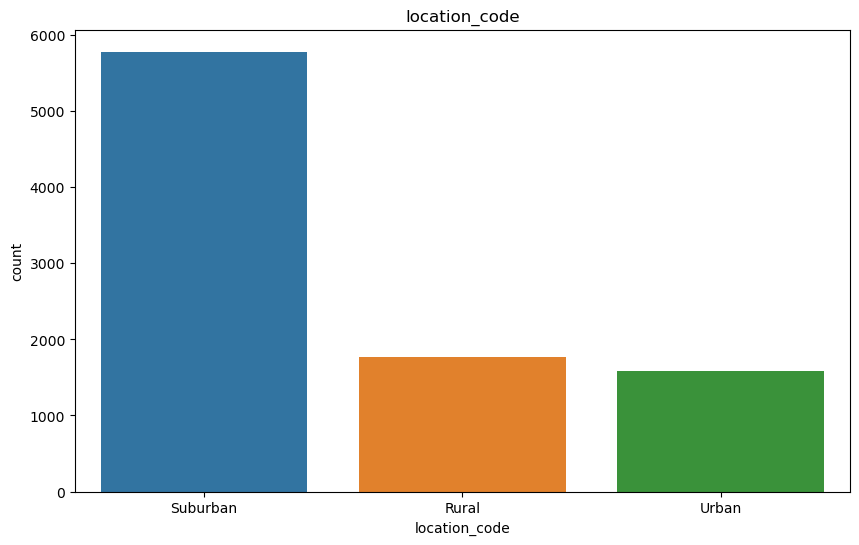

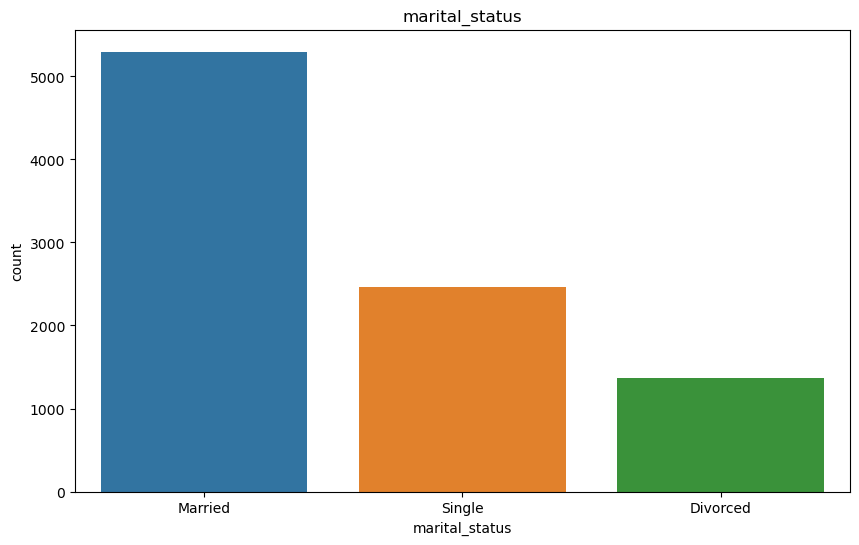

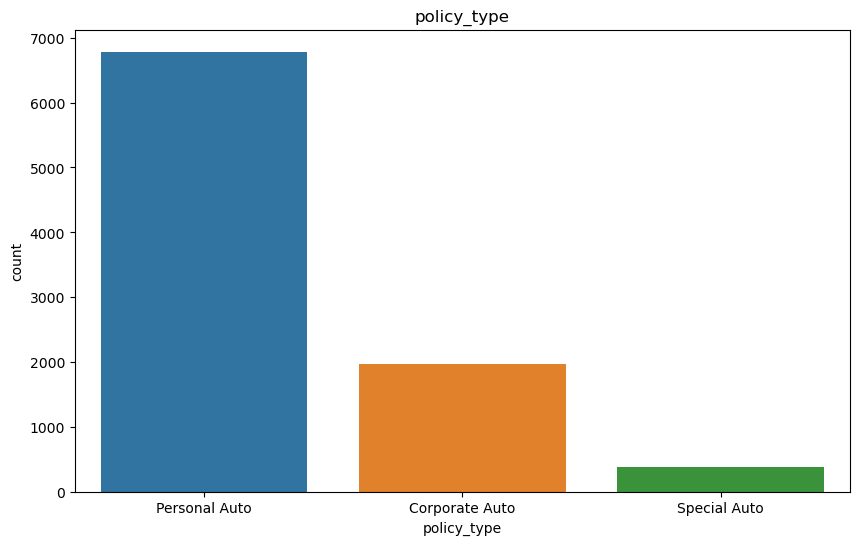

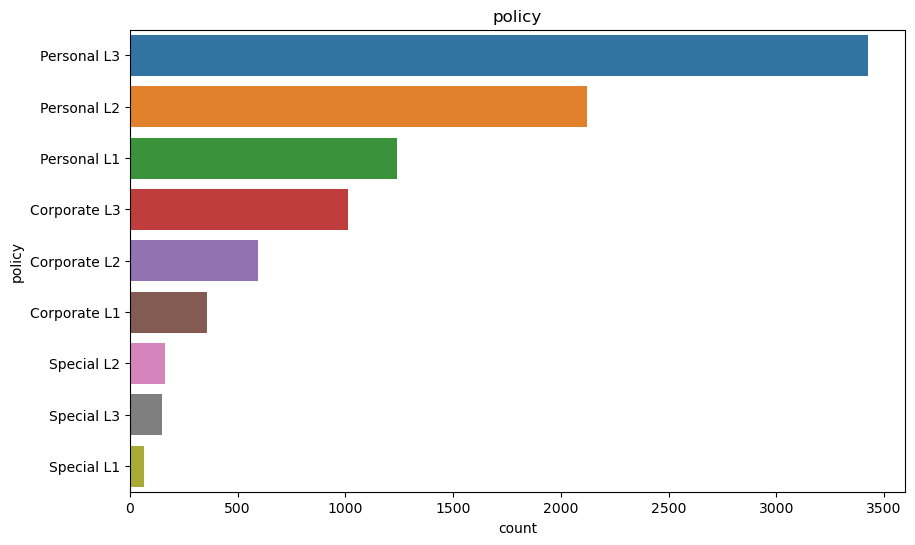

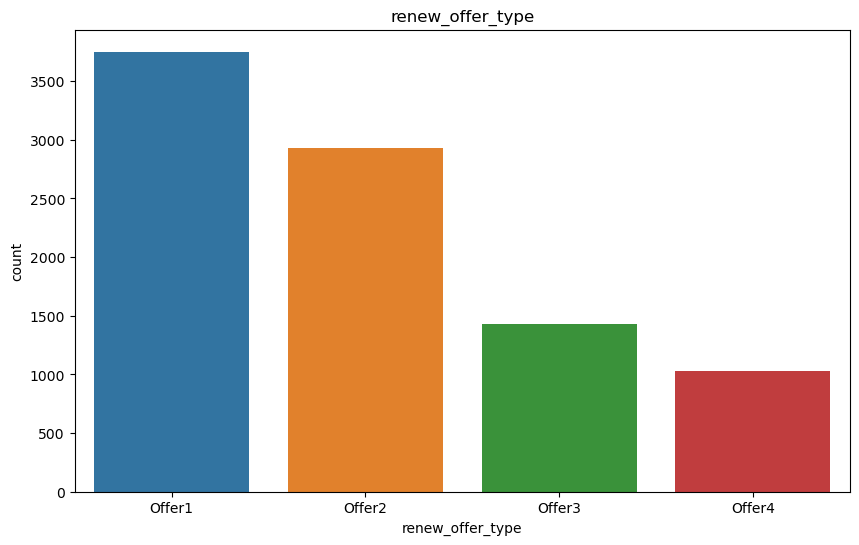

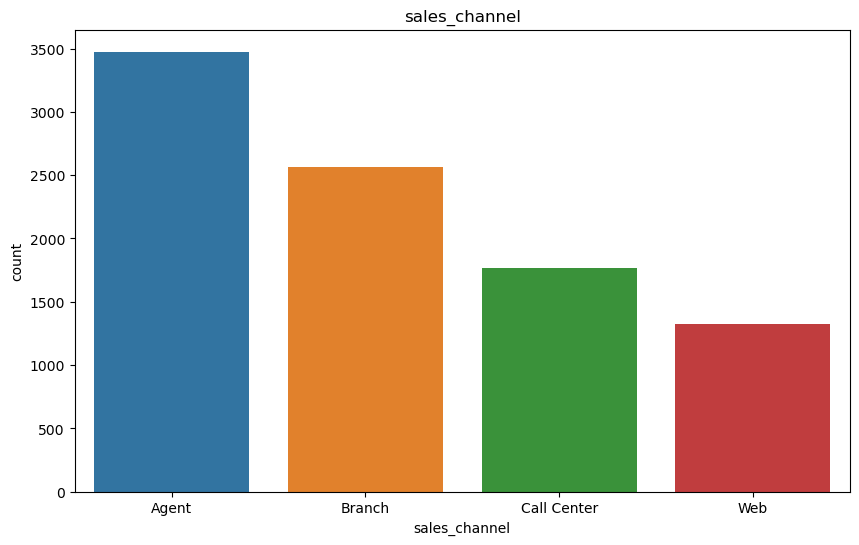

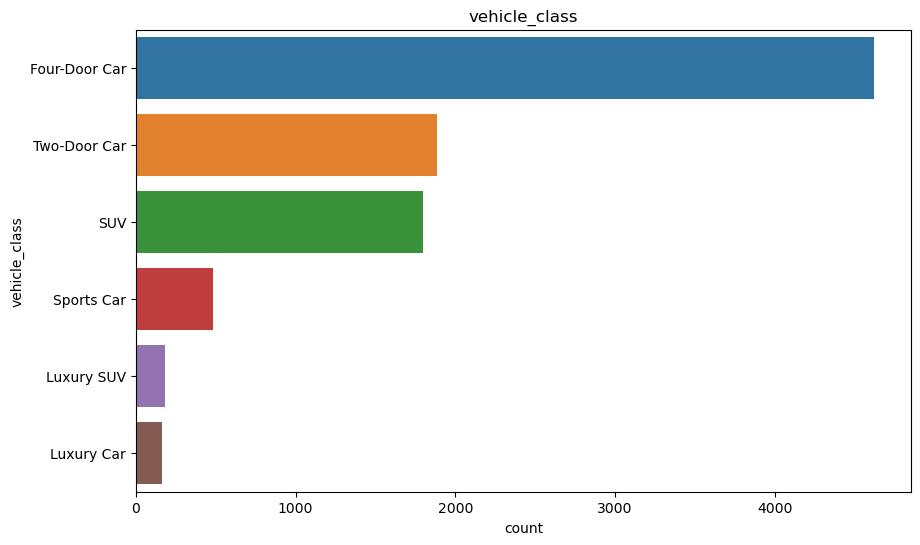

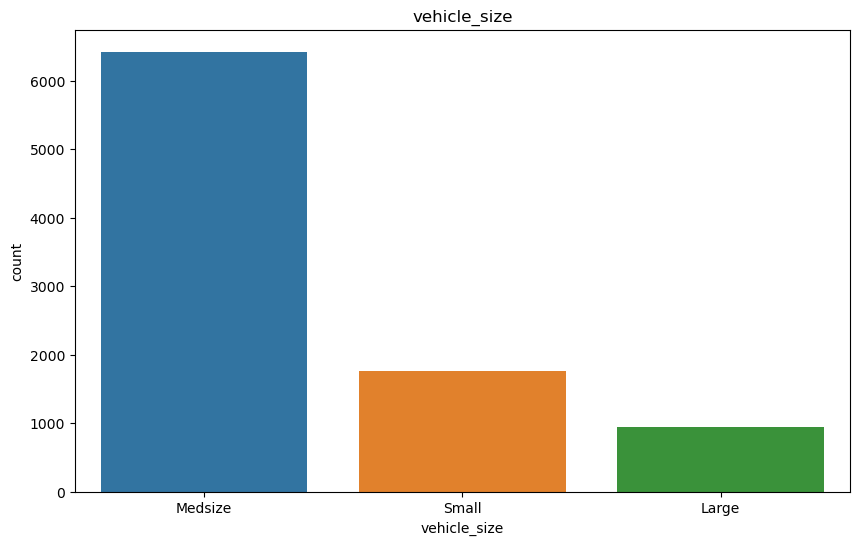

In [24]:
create_countplots(data)

2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.


In [25]:
data = data.drop('policy_type', axis=1)

In [26]:
data['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [27]:
def clean(x):
    if x in ['Personal L1', 'Corporate L1', 'Special L1']: 
        return 'L1'
    elif x in ['Personal L2', 'Corporate L2', 'Special L2']: 
        return 'L2'
    else: 
        return 'L3' 
data['policy'] = data['policy'].apply(clean)

In [28]:
data['policy'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)


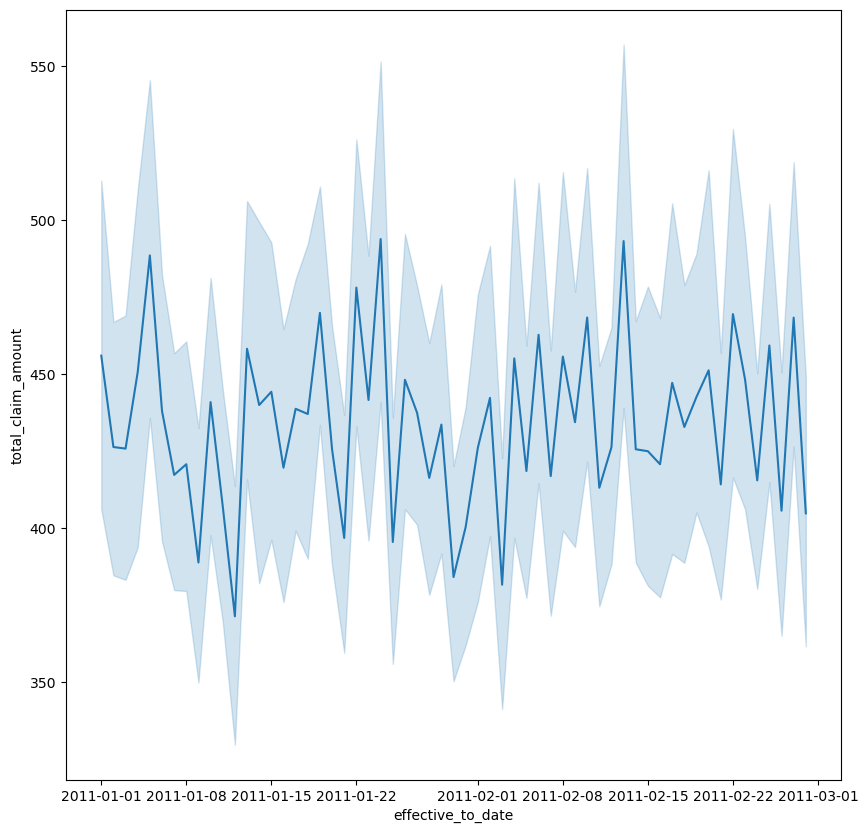

In [29]:
plt.figure(figsize=(10,10))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=data)
plt.show()

4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
* day with the day number of effective_to_date
* day_name with the day NAME of effective_to_date
* week with the week of effective_to_date
* month with the month NAME of effective_to_date
* total_claim_amount with total_claim_amount


In [30]:
new_data = pd.DataFrame()
new_data['day'] = data['effective_to_date'].dt.day
new_data['day_name'] = data['effective_to_date'].dt.day_name()
new_data['week'] = data['effective_to_date'].dt.isocalendar().week
new_data['month'] = data['effective_to_date'].dt.month_name()
new_data['total_claim_amount'] = data['total_claim_amount']
new_data['number_of_open_complaints'] = data['number_of_open_complaints']
new_data.head()

,day,day_name,week,month,total_claim_amount,number_of_open_complaints
0,24,Thursday,8,February,384.811147,0
1,31,Monday,5,January,1131.464935,0
2,19,Saturday,7,February,566.472247,0
3,20,Thursday,3,January,529.881344,0
4,3,Thursday,5,February,138.130879,0


5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)


In [31]:
total_claim_by_day = new_data.groupby('day_name')['total_claim_amount'].sum().round(2)
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_claim_by_day = total_claim_by_day.reindex(index=list_of_correct_days)
total_claim_by_day

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?


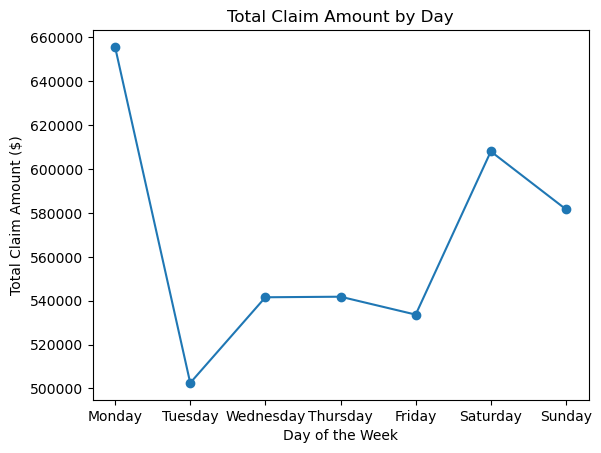

In [32]:
plt.plot(total_claim_by_day.index, total_claim_by_day.values, marker='o')
plt.title('Total Claim Amount by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Claim Amount ($)')
plt.show()

The monday is the day with the highest claim amount and tuesday is the day with the lowest claim amount.

7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)


In [33]:
total_claims_by_day = new_data.groupby('day_name')['number_of_open_complaints'].sum().round(2)
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_claims_by_day = total_claims_by_day.reindex(index=list_of_correct_days)
total_claims_by_day

day_name
Monday       652
Tuesday      456
Wednesday    422
Thursday     446
Friday       458
Saturday     530
Sunday       547
Name: number_of_open_complaints, dtype: int64

8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()


In [34]:
total_claim_by_day = new_data.groupby('day_name')['total_claim_amount'].median().round(2)
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_claim_by_day = total_claim_by_day.reindex(index=list_of_correct_days).sort_values(ascending=False)
total_claim_by_day

day_name
Thursday     395.33
Wednesday    392.24
Monday       385.74
Sunday       383.72
Saturday     379.20
Tuesday      378.49
Friday       371.80
Name: total_claim_amount, dtype: float64

9. Plot the median "target" by day of the week name using a seaborn barplot


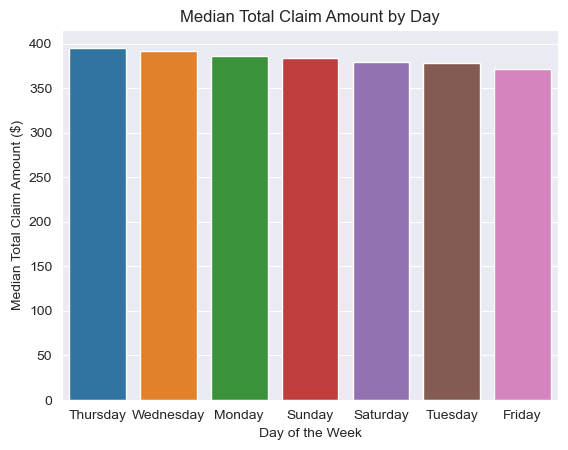

In [35]:
sns.set_style('darkgrid')
sns.barplot(x=total_claim_by_day.index, y=total_claim_by_day.values)
plt.title('Median Total Claim Amount by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Median Total Claim Amount ($)')
plt.show()

10. What can you conclude from this analysis?


There is not much variation between the median total amount claimed per day, so there are outlayers that make the amount on Monday and Saturday increase the accumulated total for those days.

11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)


In [36]:
total_claim_by_month = new_data.groupby('month')['total_claim_amount'].sum().round(2)
list_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_claim_by_month = total_claim_by_month.reindex(index=list_of_months)
total_claim_by_month

month
January      2117142.86
February     1847824.19
March               NaN
April               NaN
May                 NaN
June                NaN
July                NaN
August              NaN
September           NaN
October             NaN
November            NaN
December            NaN
Name: total_claim_amount, dtype: float64

12. Can you do a monthly analysis given the output of the previous series? Why?


No, because we have values just for two months, January and February. 

13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).


In [37]:
def remove_outliers(continuous_df, thr=3):  
    for col in continuous_df:
        mean = continuous_df[col].mean()
        std = continuous_df[col].std()
        lower_bound = mean - (std * thr)
        upper_bound = mean + (std * thr)
        continuous_df = continuous_df[(continuous_df[col] >= lower_bound) & (continuous_df[col] <= upper_bound)] 
    return continuous_df

continuous_df = remove_outliers(continuous_df)

In [38]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.


In [39]:
continuous_clean_df = remove_outliers(continuous_df)
continuous_clean_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
5,8256.297800,62902,69,94,159.383042
...,...,...,...,...,...
9128,4100.398533,47761,104,58,541.282007
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.


In [40]:
df = pd.concat([categorical_df, continuous_clean_df, discrete_df, new_data], axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(columns=['policy_type', 'customer'])
df = df.dropna()
df = df.reset_index(drop=True)
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,...,69.0,5.0,384.811147,32,0,1,24,Thursday,8,February
1,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,...,108.0,38.0,566.472247,18,0,2,19,Saturday,7,February
2,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,...,106.0,65.0,529.881344,18,0,7,20,Thursday,3,January
3,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,...,73.0,44.0,138.130879,12,0,1,3,Thursday,5,February
4,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal L3,Offer2,...,69.0,94.0,159.383042,14,0,2,25,Tuesday,4,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,No,Premium,College,Employed,F,Suburban,Single,Personal L2,Offer1,...,104.0,58.0,541.282007,16,0,1,6,Thursday,1,January
8163,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,...,79.0,28.0,379.200000,14,0,1,12,Saturday,6,February
8164,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,...,85.0,37.0,790.784983,9,3,2,6,Sunday,5,February
8165,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,...,96.0,3.0,691.200000,34,0,3,3,Thursday,5,February


In [41]:
def clean(x):
    if x in ['Personal L1', 'Corporate L1', 'Special L1']: 
        return 'L1'
    elif x in ['Personal L2', 'Corporate L2', 'Special L2']: 
        return 'L2'
    else: 
        return 'L3' 
df['policy'] = df['policy'].apply(clean)

In [42]:
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,69.0,5.0,384.811147,32,0,1,24,Thursday,8,February
1,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,108.0,38.0,566.472247,18,0,2,19,Saturday,7,February
2,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,...,106.0,65.0,529.881344,18,0,7,20,Thursday,3,January
3,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,...,73.0,44.0,138.130879,12,0,1,3,Thursday,5,February
4,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,L3,Offer2,...,69.0,94.0,159.383042,14,0,2,25,Tuesday,4,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,No,Premium,College,Employed,F,Suburban,Single,L2,Offer1,...,104.0,58.0,541.282007,16,0,1,6,Thursday,1,January
8163,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,...,79.0,28.0,379.200000,14,0,1,12,Saturday,6,February
8164,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,...,85.0,37.0,790.784983,9,3,2,6,Sunday,5,February
8165,California,No,Extended,College,Employed,M,Suburban,Married,L2,Offer3,...,96.0,3.0,691.200000,34,0,3,3,Thursday,5,February


16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.


In [43]:
cols = list(df.columns)
cols.remove('total_claim_amount')
cols.append('total_claim_amount')
df = df.reindex(columns=cols)
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
2,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
3,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879
4,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,L3,Offer2,...,69.0,94.0,14,0,2,25,Tuesday,4,January,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,No,Premium,College,Employed,F,Suburban,Single,L2,Offer1,...,104.0,58.0,16,0,1,6,Thursday,1,January,541.282007
8163,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,...,79.0,28.0,14,0,1,12,Saturday,6,February,379.200000
8164,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,...,85.0,37.0,9,3,2,6,Sunday,5,February,790.784983
8165,California,No,Extended,College,Employed,M,Suburban,Married,L2,Offer3,...,96.0,3.0,34,0,3,3,Thursday,5,February,691.200000


17. Turn the response column values into (Yes=1/No=0).


In [44]:
df['response'] = df['response'].map({'Yes': 1, 'No': 0})
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,Nevada,0,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
2,California,0,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
3,Washington,0,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879
4,Oregon,1,Basic,Bachelor,Employed,F,Rural,Married,L3,Offer2,...,69.0,94.0,14,0,2,25,Tuesday,4,January,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,0,Premium,College,Employed,F,Suburban,Single,L2,Offer1,...,104.0,58.0,16,0,1,6,Thursday,1,January,541.282007
8163,California,1,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,...,79.0,28.0,14,0,1,12,Saturday,6,February,379.200000
8164,California,0,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,...,85.0,37.0,9,3,2,6,Sunday,5,February,790.784983
8165,California,0,Extended,College,Employed,M,Suburban,Married,L2,Offer3,...,96.0,3.0,34,0,3,3,Thursday,5,February,691.200000


18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.


In [45]:
df['education'].value_counts()

Bachelor                2452
College                 2421
High School or Below    2315
Master                   660
Doctor                   319
Name: education, dtype: int64

In [46]:
df['education'] = df['education'].replace({'Master': 'Graduate', 'Doctor': 'Graduate'})
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,Nevada,0,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
2,California,0,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
3,Washington,0,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879
4,Oregon,1,Basic,Bachelor,Employed,F,Rural,Married,L3,Offer2,...,69.0,94.0,14,0,2,25,Tuesday,4,January,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,0,Premium,College,Employed,F,Suburban,Single,L2,Offer1,...,104.0,58.0,16,0,1,6,Thursday,1,January,541.282007
8163,California,1,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,...,79.0,28.0,14,0,1,12,Saturday,6,February,379.200000
8164,California,0,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,...,85.0,37.0,9,3,2,6,Sunday,5,February,790.784983
8165,California,0,Extended,College,Employed,M,Suburban,Married,L2,Offer3,...,96.0,3.0,34,0,3,3,Thursday,5,February,691.200000


In [47]:
df['education'].value_counts()

Bachelor                2452
College                 2421
High School or Below    2315
Graduate                 979
Name: education, dtype: int64

19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.


In [48]:
df['employmentstatus'].value_counts()

Employed         5125
Unemployed       2037
Medical Leave     388
Disabled          359
Retired           258
Name: employmentstatus, dtype: int64

In [49]:
df['employmentstatus'] = df['employmentstatus'].replace({'Medical Leave': 'Inactive', 'Disabled': 'Inactive', 'Retired':'Inactive'})
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,Nevada,0,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
2,California,0,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
3,Washington,0,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879
4,Oregon,1,Basic,Bachelor,Employed,F,Rural,Married,L3,Offer2,...,69.0,94.0,14,0,2,25,Tuesday,4,January,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,0,Premium,College,Employed,F,Suburban,Single,L2,Offer1,...,104.0,58.0,16,0,1,6,Thursday,1,January,541.282007
8163,California,1,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,...,79.0,28.0,14,0,1,12,Saturday,6,February,379.200000
8164,California,0,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,...,85.0,37.0,9,3,2,6,Sunday,5,February,790.784983
8165,California,0,Extended,College,Employed,M,Suburban,Married,L2,Offer3,...,96.0,3.0,34,0,3,3,Thursday,5,February,691.200000


In [50]:
df['employmentstatus'].value_counts()

Employed      5125
Unemployed    2037
Inactive      1005
Name: employmentstatus, dtype: int64

20. Deal with column Gender turning the values into (1/0).


In [51]:
mapping_dict = {'F': 1, 'M': 0}
df['gender'] = df['gender'].map(mapping_dict)
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,Basic,Bachelor,Employed,1,Suburban,Married,L3,Offer1,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,Nevada,0,Premium,Bachelor,Employed,1,Suburban,Married,L3,Offer1,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
2,California,0,Basic,Bachelor,Unemployed,0,Suburban,Married,L2,Offer1,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
3,Washington,0,Basic,Bachelor,Employed,0,Rural,Single,L1,Offer1,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879
4,Oregon,1,Basic,Bachelor,Employed,1,Rural,Married,L3,Offer2,...,69.0,94.0,14,0,2,25,Tuesday,4,January,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,0,Premium,College,Employed,1,Suburban,Single,L2,Offer1,...,104.0,58.0,16,0,1,6,Thursday,1,January,541.282007
8163,California,1,Extended,College,Employed,1,Suburban,Divorced,L3,Offer1,...,79.0,28.0,14,0,1,12,Saturday,6,February,379.200000
8164,California,0,Extended,Bachelor,Unemployed,0,Suburban,Single,L2,Offer1,...,85.0,37.0,9,3,2,6,Sunday,5,February,790.784983
8165,California,0,Extended,College,Employed,0,Suburban,Married,L2,Offer3,...,96.0,3.0,34,0,3,3,Thursday,5,February,691.200000


In [52]:
df['gender'].value_counts()

1    4176
0    3991
Name: gender, dtype: int64

21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.


In [53]:
df['vehicle_class'].value_counts()

Four-Door Car    4439
Two-Door Car     1830
SUV              1501
Sports Car        397
Name: vehicle_class, dtype: int64

In [54]:
df['vehicle_class'] = df['vehicle_class'].replace({'SUV': 'Luxury', 'Sports Car': 'Luxury'})
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,Basic,Bachelor,Employed,1,Suburban,Married,L3,Offer1,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,Nevada,0,Premium,Bachelor,Employed,1,Suburban,Married,L3,Offer1,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
2,California,0,Basic,Bachelor,Unemployed,0,Suburban,Married,L2,Offer1,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
3,Washington,0,Basic,Bachelor,Employed,0,Rural,Single,L1,Offer1,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879
4,Oregon,1,Basic,Bachelor,Employed,1,Rural,Married,L3,Offer2,...,69.0,94.0,14,0,2,25,Tuesday,4,January,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,0,Premium,College,Employed,1,Suburban,Single,L2,Offer1,...,104.0,58.0,16,0,1,6,Thursday,1,January,541.282007
8163,California,1,Extended,College,Employed,1,Suburban,Divorced,L3,Offer1,...,79.0,28.0,14,0,1,12,Saturday,6,February,379.200000
8164,California,0,Extended,Bachelor,Unemployed,0,Suburban,Single,L2,Offer1,...,85.0,37.0,9,3,2,6,Sunday,5,February,790.784983
8165,California,0,Extended,College,Employed,0,Suburban,Married,L2,Offer3,...,96.0,3.0,34,0,3,3,Thursday,5,February,691.200000


In [55]:
df['vehicle_class'].value_counts()

Four-Door Car    4439
Luxury           1898
Two-Door Car     1830
Name: vehicle_class, dtype: int64

22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering. Encode the coverage: "Premium" > "Extended" > "Basic".


In [56]:
df['coverage'].value_counts()

Basic       5133
Extended    2447
Premium      587
Name: coverage, dtype: int64

In [57]:
mapping_dict = {'Basic': 0, 'Extended': 1, 'Premium': 2}
df['coverage'] = df['coverage'].replace(mapping_dict)
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,0,Bachelor,Employed,1,Suburban,Married,L3,Offer1,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,Nevada,0,2,Bachelor,Employed,1,Suburban,Married,L3,Offer1,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
2,California,0,0,Bachelor,Unemployed,0,Suburban,Married,L2,Offer1,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
3,Washington,0,0,Bachelor,Employed,0,Rural,Single,L1,Offer1,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879
4,Oregon,1,0,Bachelor,Employed,1,Rural,Married,L3,Offer2,...,69.0,94.0,14,0,2,25,Tuesday,4,January,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,0,2,College,Employed,1,Suburban,Single,L2,Offer1,...,104.0,58.0,16,0,1,6,Thursday,1,January,541.282007
8163,California,1,1,College,Employed,1,Suburban,Divorced,L3,Offer1,...,79.0,28.0,14,0,1,12,Saturday,6,February,379.200000
8164,California,0,1,Bachelor,Unemployed,0,Suburban,Single,L2,Offer1,...,85.0,37.0,9,3,2,6,Sunday,5,February,790.784983
8165,California,0,1,College,Employed,0,Suburban,Married,L2,Offer3,...,96.0,3.0,34,0,3,3,Thursday,5,February,691.200000


23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".


In [58]:
df['employmentstatus'].value_counts()

Employed      5125
Unemployed    2037
Inactive      1005
Name: employmentstatus, dtype: int64

In [59]:
mapping_dict = {'Unemployed': 0, 'Inactive': 1, 'Employed': 2}
df['employmentstatus'] = df['employmentstatus'].replace(mapping_dict)
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,0,Bachelor,2,1,Suburban,Married,L3,Offer1,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,Nevada,0,2,Bachelor,2,1,Suburban,Married,L3,Offer1,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
2,California,0,0,Bachelor,0,0,Suburban,Married,L2,Offer1,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
3,Washington,0,0,Bachelor,2,0,Rural,Single,L1,Offer1,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879
4,Oregon,1,0,Bachelor,2,1,Rural,Married,L3,Offer2,...,69.0,94.0,14,0,2,25,Tuesday,4,January,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,0,2,College,2,1,Suburban,Single,L2,Offer1,...,104.0,58.0,16,0,1,6,Thursday,1,January,541.282007
8163,California,1,1,College,2,1,Suburban,Divorced,L3,Offer1,...,79.0,28.0,14,0,1,12,Saturday,6,February,379.200000
8164,California,0,1,Bachelor,0,0,Suburban,Single,L2,Offer1,...,85.0,37.0,9,3,2,6,Sunday,5,February,790.784983
8165,California,0,1,College,2,0,Suburban,Married,L2,Offer3,...,96.0,3.0,34,0,3,3,Thursday,5,February,691.200000


24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".


In [60]:
df['location_code'].value_counts()

Suburban    5094
Rural       1625
Urban       1448
Name: location_code, dtype: int64

In [61]:
mapping_dict = {'Rural': 0, 'Suburban': 1, 'Urban': 2}
df['location_code'] = df['location_code'].replace(mapping_dict)
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,0,Bachelor,2,1,1,Married,L3,Offer1,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,Nevada,0,2,Bachelor,2,1,1,Married,L3,Offer1,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
2,California,0,0,Bachelor,0,0,1,Married,L2,Offer1,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
3,Washington,0,0,Bachelor,2,0,0,Single,L1,Offer1,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879
4,Oregon,1,0,Bachelor,2,1,0,Married,L3,Offer2,...,69.0,94.0,14,0,2,25,Tuesday,4,January,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,0,2,College,2,1,1,Single,L2,Offer1,...,104.0,58.0,16,0,1,6,Thursday,1,January,541.282007
8163,California,1,1,College,2,1,1,Divorced,L3,Offer1,...,79.0,28.0,14,0,1,12,Saturday,6,February,379.200000
8164,California,0,1,Bachelor,0,0,1,Single,L2,Offer1,...,85.0,37.0,9,3,2,6,Sunday,5,February,790.784983
8165,California,0,1,College,2,0,1,Married,L2,Offer3,...,96.0,3.0,34,0,3,3,Thursday,5,February,691.200000


25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".


In [62]:
df['vehicle_size'].value_counts()

Medsize    5744
Small      1565
Large       858
Name: vehicle_size, dtype: int64

In [63]:
mapping_dict = {'Small': 0, 'Medsize': 1, 'Large': 2}
df['vehicle_size'] = df['vehicle_size'].replace(mapping_dict)
df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,day,day_name,week,month,total_claim_amount
0,Washington,0,0,Bachelor,2,1,1,Married,L3,Offer1,...,69.0,5.0,32,0,1,24,Thursday,8,February,384.811147
1,Nevada,0,2,Bachelor,2,1,1,Married,L3,Offer1,...,108.0,38.0,18,0,2,19,Saturday,7,February,566.472247
2,California,0,0,Bachelor,0,0,1,Married,L2,Offer1,...,106.0,65.0,18,0,7,20,Thursday,3,January,529.881344
3,Washington,0,0,Bachelor,2,0,0,Single,L1,Offer1,...,73.0,44.0,12,0,1,3,Thursday,5,February,138.130879
4,Oregon,1,0,Bachelor,2,1,0,Married,L3,Offer2,...,69.0,94.0,14,0,2,25,Tuesday,4,January,159.383042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,California,0,2,College,2,1,1,Single,L2,Offer1,...,104.0,58.0,16,0,1,6,Thursday,1,January,541.282007
8163,California,1,1,College,2,1,1,Divorced,L3,Offer1,...,79.0,28.0,14,0,1,12,Saturday,6,February,379.200000
8164,California,0,1,Bachelor,0,0,1,Single,L2,Offer1,...,85.0,37.0,9,3,2,6,Sunday,5,February,790.784983
8165,California,0,1,College,2,0,1,Married,L2,Offer3,...,96.0,3.0,34,0,3,3,Thursday,5,February,691.200000


26. Get a dataframe with the categorical nominal columns


In [64]:
cat_nominal = df.select_dtypes(include=['object'])
cat_nominal

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name,month
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Thursday,February
1,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Saturday,February
2,California,Bachelor,Married,L2,Offer1,Call Center,Luxury,Thursday,January
3,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,Thursday,February
4,Oregon,Bachelor,Married,L3,Offer2,Web,Two-Door Car,Tuesday,January
...,...,...,...,...,...,...,...,...,...
8162,California,College,Single,L2,Offer1,Branch,Four-Door Car,Thursday,January
8163,California,College,Divorced,L3,Offer1,Branch,Four-Door Car,Saturday,February
8164,California,Bachelor,Single,L2,Offer1,Branch,Four-Door Car,Sunday,February
8165,California,College,Married,L2,Offer3,Branch,Four-Door Car,Thursday,February


27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
 levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]


In [65]:
levels = []
for col in cat_nominal:
    levels.append(list(cat_nominal[col].unique()))
levels

[['Washington', 'Nevada', 'California', 'Oregon', 'Arizona'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer2', 'Offer4', 'Offer3'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Luxury', 'Four-Door Car'],
 ['Thursday',
  'Saturday',
  'Tuesday',
  'Monday',
  'Sunday',
  'Wednesday',
  'Friday'],
 ['February', 'January']]

28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [66]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', categories=levels)

In [67]:
encoder

OneHotEncoder(categories=[['Washington', 'Nevada', 'California', 'Oregon',
                           'Arizona'],
                          ['Bachelor', 'College', 'Graduate',
                           'High School or Below'],
                          ['Married', 'Single', 'Divorced'], ['L3', 'L2', 'L1'],
                          ['Offer1', 'Offer2', 'Offer4', 'Offer3'],
                          ['Agent', 'Call Center', 'Web', 'Branch'],
                          ['Two-Door Car', 'Luxury', 'Four-Door Car'],
                          ['Thursday', 'Saturday', 'Tuesday', 'Monday',
                           'Sunday', 'Wednesday', 'Friday'],
                          ['February', 'January']],
              drop='first')